In [105]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [106]:
al2_points_2 = np.loadtxt("../points/points_iplr2_l2.txt")
al2_points_4 = np.loadtxt("../points/points_iplr2_l4.txt")
al2_points_6 = np.loadtxt("../points/points_iplr2_l6.txt")
al2_points_8 = np.loadtxt("../points/points_iplr2_l8.txt")
al2_points_10 = np.loadtxt("../points/points_iplr2_l10.txt")

In [151]:
def test (x,s):
    f = 1.0
    t = 0.000001
    #s = len(x)
    for i in range(s):
        #f *= (1 - (x[i]-0.5)/((i+1)**6))
        f *= (1- (x[i]-0.5) * t* math.exp(-0.1*i))
        #f *= (1- (x[i]-0.5) * math.exp(-4.*i))
    return f

In [152]:
def error(points, s):
    exp = 0.0
    err = 0
    for i in range(len(points)):
        exp += test(points[i,:], s)
    exp /= len(points)
    return abs(exp - 1.)

In [153]:
s=100

al2_err2 = error(al2_points_2,s)
al2_err4 = error(al2_points_4,s)
al2_err6 = error(al2_points_6,s)
al2_err8 = error(al2_points_8,s)
al2_err10 = error(al2_points_10,s)

al2_err = np.array([al2_err2, al2_err4, al2_err6, al2_err8, al2_err10])

num = np.array([2.**2, 2.**4, 2.**6, 2.**8, 2.**10])

c=0.01

rate_d2 =  c*num**(-2)
rate_d3 =  0.1*c*num**(-3)

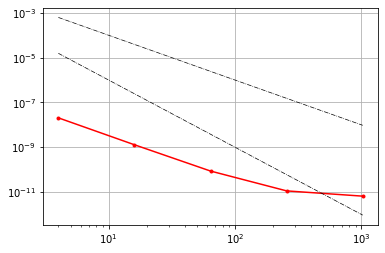

In [154]:
fig, ax = plt.subplots()

ax.loglog(num, al2_err,'r.-')
ax.loglog(num, rate_d2,'k-.',lw=0.7)
ax.loglog(num, rate_d3,'k-.',lw=0.7)

ax.grid()

plt.show()